# Исследование объявлений о продаже квартир

В рамках этого проекта мы попытаемся определить параметры, определяющие рыночную цену объекта недвижимости. 

Для этого вопользуемся данными сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Мы также попытаемся определить географические границы и отличительные особенности такого сегмента рынка недвижимости как квартиры в центре города

По каждой квартире на продажу доступны два вида данных: предоставленные пользователем или полученные автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма и тд) 

**Оглавление:**
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)
2. [Шаг 2. Предобработка данных](#step2)
    1. [определите и изучите пропущенные значения](#step21)
    2. [приведите данные к нужным типам](#step22)
3. [Шаг 3. Посчитайте и добавьте в таблицу](#step3)
    1. [цену квадратного метра](#step31)
    2. [день недели, месяц и год публикации объявления](#step32)
    3. [этаж квартиры; варианты — первый, последний, другой](#step33)
    4. [соотношение жилой и общей площади, а также отношение площади кухни к общей](#step34)
4. [Шаг 4. Проведите исследовательский анализ данных и выполните инструкции](#step4)
    1. [параметры: площадь, цена, число комнат, высота потолков](#step41)
    2. [время продажи квартиры](#step42)
    3. [редкие и выбивающиеся значения](#step43)
    4. [какие факторы больше всего влияют на стоимость квартиры?](#step44)
    5. [10 населённых пунктов с наибольшим числом объявлений](#step45)
    6. [какая область входит в центр](#step46)
    7. [сегмент квартир в центре](#step47)
5. [Шаг 5. Общий вывод](#step5)

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

<a id="step1"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Данные представлены 22 колонками. Число наблюдений - 23699. Нет пропущенных значений в таких важных столбцах как: цена, общая площадь, количество комнат, дата размещения


Данные склеены в одну строку. Мы исправили это, используя разделитель sep='\t'

<a id="step2"></a>
### Шаг 2. Предобработка данных

<a id="step21"></a>
#### определите и изучите пропущенные значения

*общее количество этажей в доме*


пропущено всего 86 значений. замена пропущенных значений на медианное не должно внести существенного искажения в данные

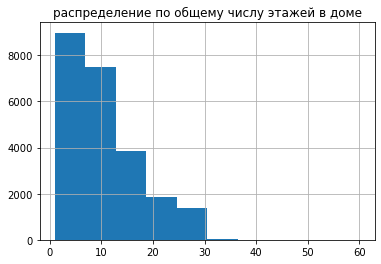

In [4]:
df['floors_total'].hist()
plt.title('распределение по общему числу этажей в доме')
plt.show()

In [5]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

*жилая площадь*


пропущено 1903 значения. для заполнения пропусков попробуем сгруппировать данные по общей площади квартиры  и использовать медианное значение жилой площади для каждой группы. Для общей площади есть 3 важных значения - 40, 52 и 70 кв.м. Посмотрим также на гистограмму для определения других важных пороговых значений общей площади

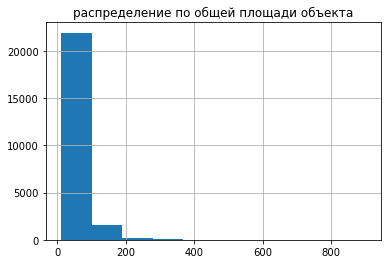

In [6]:
df['total_area'].hist()
plt.title('распределение по общей площади объекта')
plt.show()

In [7]:
df['area_group'] = pd.cut(df['total_area'],
                             [0,40,52,70,100,200,df['total_area'].max()])

In [8]:
df['living_area'] = df['living_area'].fillna(df.groupby('area_group')['living_area'].transform('median'))

*площадь кухни*

поступим аналогичным образом

In [9]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('area_group')['kitchen_area'].transform('median'))

*высота потолков:* 


пропущено больше 9000 значений. из имеющихся данных 75% объявлений укладываются в разумные 2,8 м. выглядит реалистичным допущение, что большие по площади квартиры характеризуются более высокими потолками. поэтому опять поступим аналогично

In [10]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('area_group')['ceiling_height'].transform('median'))

*балкон*

пропущенное значение в этом столбце с большой долей вероятности означает, что балкона нет. заменим пропуски на 0

In [11]:
df['balcony'] = df['balcony'].fillna(0)

*апартаменты*

пропущенное значение вероятнее всего говорит о том, что объект из объявления не является апартаментами. 

In [12]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

замена в этом столбце кажется важной, так как жилая квартира и апартаменты очень различаются по юридическим характеристикам и спрос на них предъявляют разные группы потребителей с разными целями. 

заменим пропуски на False

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [14]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

*время размещения объявления*


пропущено 3181 значение. сложно однозначно ответить на вопрос о причинах пропусков и связи между сроком экспозиции и другими характеристиками объекта. попробуем предположить, что дешевые объекты продаются быстрее, а дорогие медленнее, так как чем дороже объект, тем меньше у него потенциальных покупателей. попробуем заполнить пропуски, используя группировку по цене. сравним распределение до и после заполнения пропусков

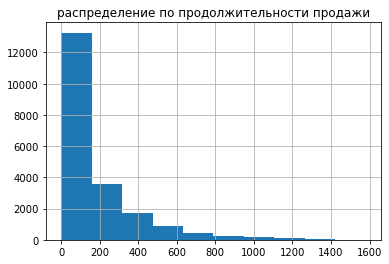

In [15]:
df['days_exposition'].hist()
plt.title('распределение по продолжительности продажи')
plt.show()

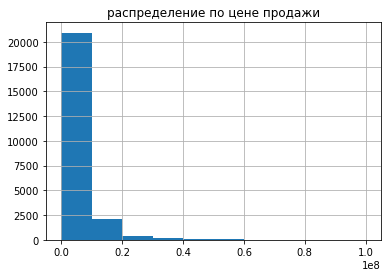

In [16]:
df['last_price'].hist(range=(0,100000000))
plt.title('распределение по цене продажи')
plt.show()

In [17]:
df['price_group'] = pd.cut(df['last_price'],
                             [0,3400000,4650000,6800000,10000000,df['last_price'].max()])

In [18]:
df['days_exposition'] = df['days_exposition'].fillna(df.groupby('price_group')['days_exposition'].transform('median'))

In [19]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,price_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,156.0,"(100.0, 200.0]","(10000000.0, 763000000.0]"
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(40.0, 52.0]","(0.0, 3400000.0]"
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(52.0, 70.0]","(4650000.0, 6800000.0]"
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,72.2,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(100.0, 200.0]","(10000000.0, 763000000.0]"
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(70.0, 100.0]","(6800000.0, 10000000.0]"


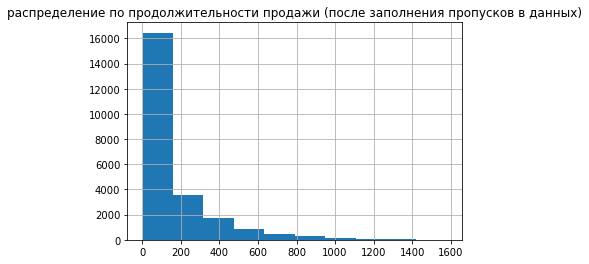

In [20]:
df['days_exposition'].hist()
plt.title('распределение по продолжительности продажи (после заполнения пропусков в данных)')
plt.show()

Для остальных столбцов замена пропусков кажется нецелесообразной. 


Люди могут не знать или полениться вспоминать близлежащие парки и водоемы и расстояние до них, тем более удаленность от аэропорта и центра. 


Название населенного пункта невозможно восстановить на основе других данных. Наблюдений с пропущенными названиями населенного пункта 49 (0,2% от общего числа). Отбросим их

In [21]:
df=df.dropna(subset = ['locality_name'])

<a id="step22"></a>
#### приведите данные к нужным типам

требуются следующие изменения: 

сменить формат first_day_exposition на формат даты, 
сменить формат is_apartment на булев, 
перейти к строчным буквам в locality_name'

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
df['is_apartment'] = df['is_apartment'].astype(bool)

In [24]:
df['locality_name'] = df['locality_name'].str.lower()

In [25]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,price_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,156.0,"(100.0, 200.0]","(10000000.0, 763000000.0]"
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(40.0, 52.0]","(0.0, 3400000.0]"
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(52.0, 70.0]","(4650000.0, 6800000.0]"
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,72.2,9,False,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(100.0, 200.0]","(10000000.0, 763000000.0]"
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(70.0, 100.0]","(6800000.0, 10000000.0]"


In [27]:
df.duplicated().sum()

0

### Шаг 2. Вывод


Мы заполнили пропуски в столбцах ceiling_height, living_area, kitchen_area, пользуясь группировкой наблюдений по общей площади объекта


Мы заполнили пропуски в столбце balcony, предполагая, что отсутсвие информации о  балконе означает его отсутсвие


Мы заполнили пропуски в стоблце is_apartment, предполагая, что отсутсвие указания на апартаменты означает, что объект не является апартаментами


Мы заполнили пропуски в столбце floors_total, используя медианное значение


Мы заполнили пропуски в days_exposition, пользуясь группировкой наблюдений по цене


Пропуски в остальных столбцах не заполнялись. Люди могут не знать или полениться вспоминать близлежащие парки и водоемы и расстояние до них, тем более удаленность от аэропорта и центра. Название населенного пункта невозможно восстановить на основе других данных. 


Мы внесли изменения в формат столбцов first_day_exposition, is_apartment, locality_name

Проверили наличие дубликатов. Дубликатов не выявлено

<a id="step3"></a>
### Шаг 3. Посчитайте и добавьте в таблицу

<a id="step31"></a>
#### цену квадратного метра

In [28]:
df['price_per_sqm'] = df['last_price'] / df['total_area']

In [29]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,price_group,price_per_sqm
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,156.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(40.0, 52.0]","(0.0, 3400000.0]",82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(52.0, 70.0]","(4650000.0, 6800000.0]",92785.714286
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,72.2,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(70.0, 100.0]","(6800000.0, 10000000.0]",100000.000000


<a id="step32"></a>
#### день недели, месяц и год публикации объявления

In [30]:
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

In [31]:
df['exposition_month'] = df['first_day_exposition'].dt.month

In [32]:
df['exposition_year'] = df['first_day_exposition'].dt.year

In [33]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,price_group,price_per_sqm,exposition_weekday,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,156.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,"(40.0, 52.0]","(0.0, 3400000.0]",82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,"(52.0, 70.0]","(4650000.0, 6800000.0]",92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,72.2,9,False,...,84.0,3.0,234.0,424.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,"(70.0, 100.0]","(6800000.0, 10000000.0]",100000.000000,1,6,2018


<a id="step33"></a>
#### этаж квартиры; варианты — первый, последний, другой

In [34]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor != 1:
        if floor == floors_total:
            return 'последний'
        return 'другой'
    

In [35]:
row_values = [5, 5]    
row_columns = ['floor', 'floors_total']

row = pd.Series(data=row_values, index=row_columns) 

In [36]:
print(floor_type(row))

последний


In [37]:
df['floor_type'] = df.apply(floor_type, axis=1)

In [38]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_group,price_group,price_per_sqm,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,156.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,0.0,NaN,81.0,"(40.0, 52.0]","(0.0, 3400000.0]",82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,2.0,574.0,558.0,"(52.0, 70.0]","(4650000.0, 6800000.0]",92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,72.2,9,False,...,3.0,234.0,424.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,"(70.0, 100.0]","(6800000.0, 10000000.0]",100000.000000,1,6,2018,другой


<a id="step34"></a>
#### соотношение жилой и общей площади, а также отношение площади кухни к общей

In [39]:
df['area_liv_to_tot'] = df['living_area'] / df['total_area']

In [40]:
df['area_kitch_to_tot'] = df['kitchen_area'] / df['total_area']

In [41]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,area_group,price_group,price_per_sqm,exposition_weekday,exposition_month,exposition_year,floor_type,area_liv_to_tot,area_kitch_to_tot
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,156.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,81.0,"(40.0, 52.0]","(0.0, 3400000.0]",82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,558.0,"(52.0, 70.0]","(4650000.0, 6800000.0]",92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,72.2,9,False,...,424.0,"(100.0, 200.0]","(10000000.0, 763000000.0]",408176.100629,4,7,2015,другой,0.454088,0.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,121.0,"(70.0, 100.0]","(6800000.0, 10000000.0]",100000.000000,1,6,2018,другой,0.320000,0.410000


### Шаг 3. Вывод

В таблицу добавлены следующие столбцы: 
1. цена объекта в расчете на квадратный метр общей площади (**price_per_sqm**)
2. год, месяц и день недели размещения объявления (**exposition_year**, **exposition_month**, **exposition_weekday**)
3. тип этажа, на котором находится объект (**floor_type**: первый, последний, другой). Конкретный тип этажа - это очень часто используемый параметр при поиске жилья. Часто люди не любят жить на первом этаже из-за возможного нарушения приватности. Многие не любят жить на последних этажах, особенно в домах массовой серийной застройки второй половины 20 века. С другой стороны, с домах современной постройки верхние этажи часто востребованы, особенно среди молодых покупателей. Причиной является вид из окна
4. соотношение жилой площади и площади кухни к общей площади (**area_liv_to_tot**, **area_kitch_to_tot**)

<a id="step4"></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id="step41"></a>
#### параметры: площадь, цена, число комнат, высота потолков

*площадь*

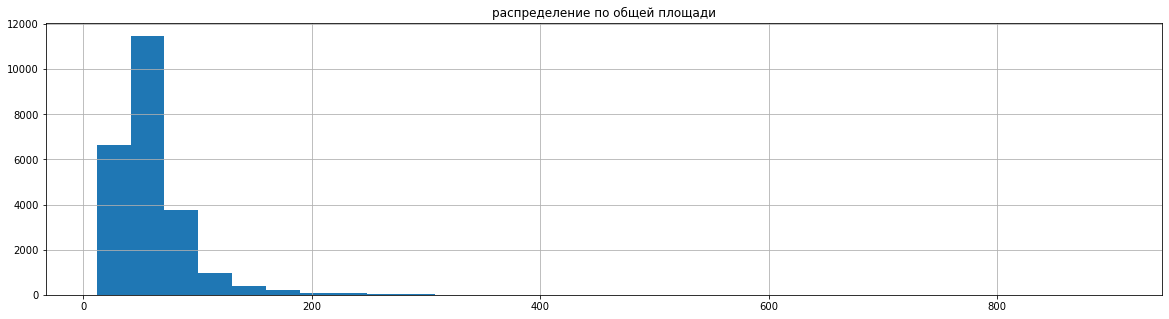

In [42]:
df['total_area'].hist(bins=30, figsize=(20, 5))
plt.title('распределение по общей площади')
plt.show()

мы видим, что после значения общей площади, равной 200 кв метров, встречаются лишь единичные объекты. пик приходится прмиерно на 50 кв. метров. Взглянем на участок (0,200) более детально

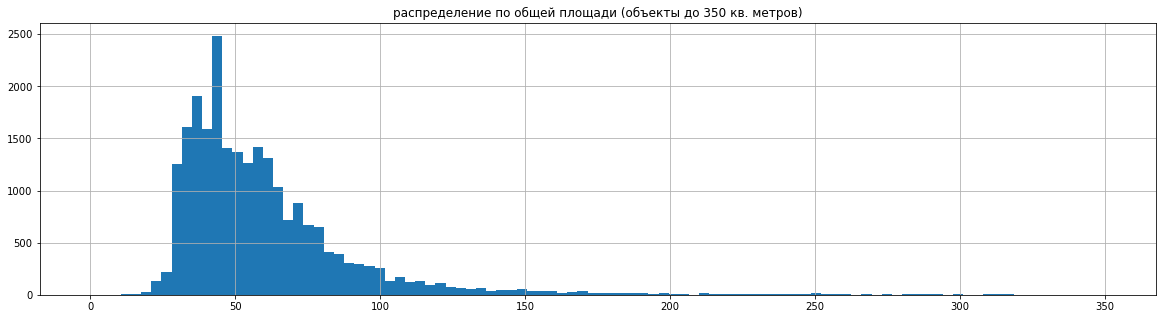

In [43]:
df['total_area'].hist(bins=100, figsize=(20, 5), range = (0, 350))
plt.title('распределение по общей площади (объекты до 350 кв. метров)')
plt.show()

гистограмма отдельного участка показывает, что наибольшее число представленных объектов по общей площади находится в диапазоне 40-45 кв. метров, что примерно соответсвует просторной однокомнатной или небольшой двухкомнатной квартире. Гистограмма быстрее убывает до показателя 105-110 кв. метров. Видимо, после этого значения наблюдения становятся более редкими

*цена*

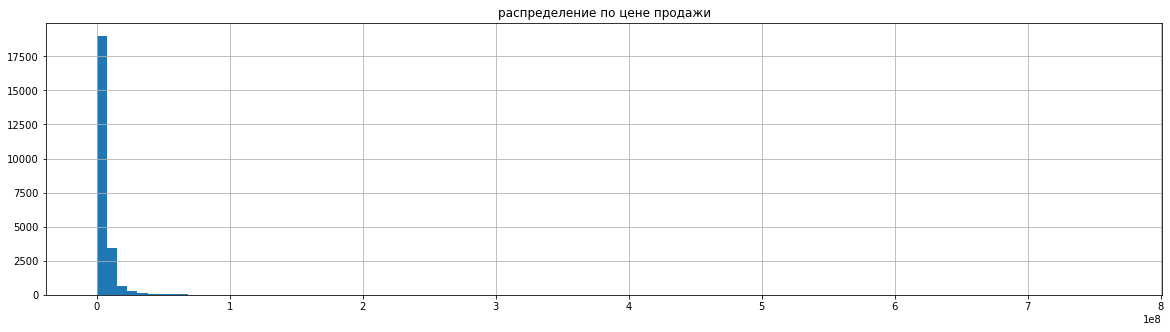

In [44]:
df['last_price'].hist(bins=100, figsize=(20, 5))
plt.title('распределение по цене продажи')
plt.show()

в таком виде гистограмма малоинформативна. Видно, что основная масса наблюдений сосредоточена около 0. Приблизим участок (0, 100 млн)

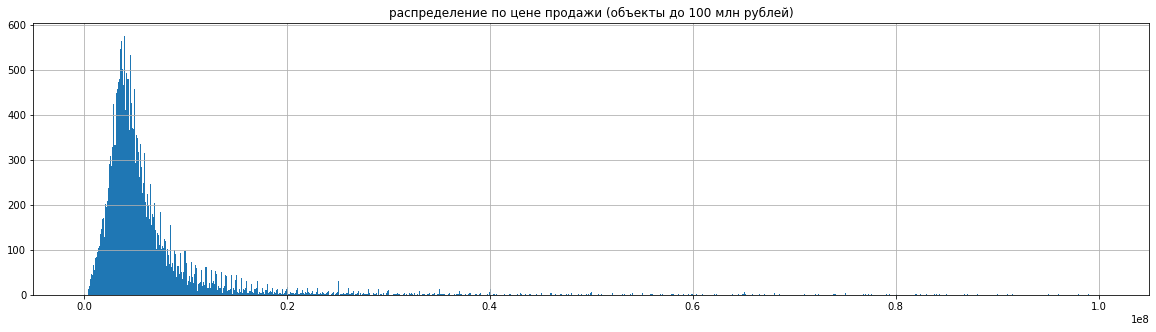

In [45]:
df['last_price'].hist(bins=1000, figsize=(20, 5), range = (0, 100000000))
plt.title('распределение по цене продажи (объекты до 100 млн рублей)')
plt.show()

по-прежнему недостаточно деталей. Стало понятно, что единичные значения начинают встречаться уже после 40 млн. Приблизим учаток (0,40 млн)

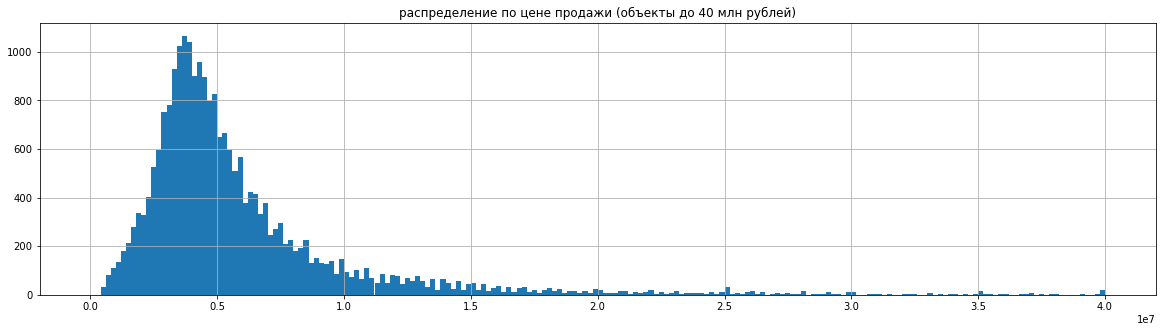

In [46]:
df['last_price'].hist(bins=200, figsize=(20, 5), range = (0, 40000000))
plt.title('распределение по цене продажи (объекты до 40 млн рублей)')
plt.show()

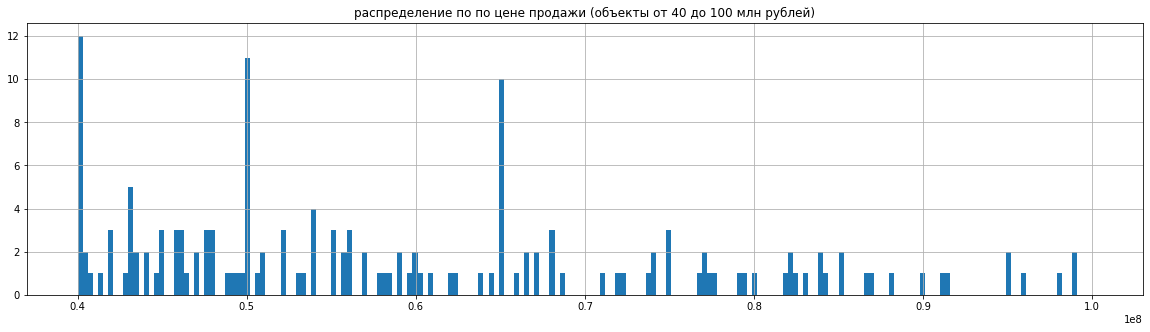

In [47]:
df['last_price'].hist(bins=200, figsize=(20, 5), range = (40000000, 100000000))
plt.title('распределение по по цене продажи (объекты от 40 до 100 млн рублей)')
plt.show()

видно, что цена довольно быстро нарастает примерно до 4 млн рублей, затем начинает плавно снижаться. причем на гистограмме хорошо видны шаги цены - пики после 4 млн рублей. видимо, это круглые значения цены. После уровня цены, примерно равного 11 млн рубей гистограмма становится более пологой. Количество объектов по каждой цене становится заметно меньше, чем до этого уровня 

*число комнат*

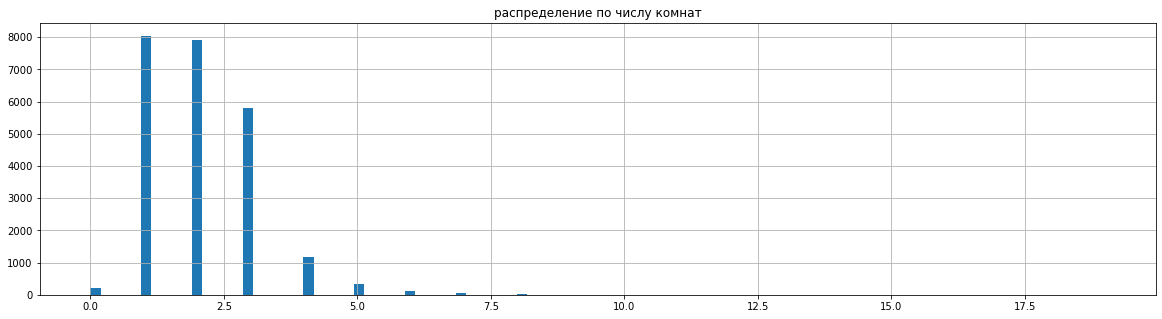

In [48]:
df['rooms'].hist(bins=100, figsize=(20, 5))
plt.title('распределение по числу комнат')
plt.show()

вполне ожидаемо гистграмма показывает дискретные значения. Примерно одинаковое количество объектов имеют 1 или 2 комнаты. Приблизим участок (0, 10)

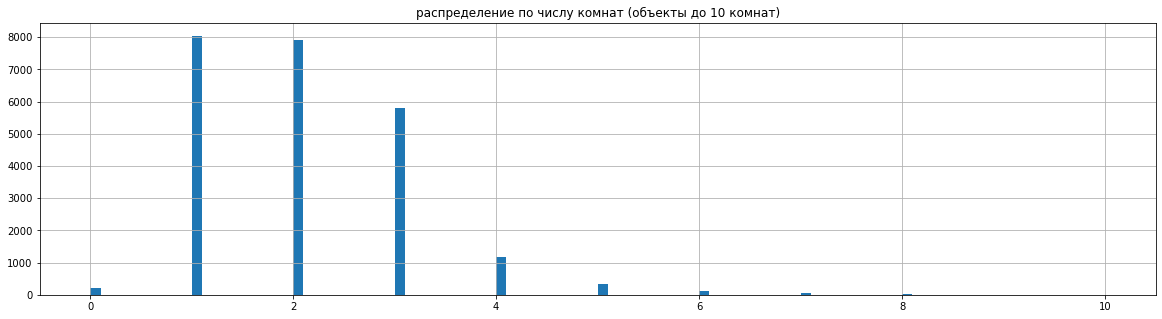

In [49]:
df['rooms'].hist(bins=100, figsize=(20, 5), range = (0, 10))
plt.title('распределение по числу комнат (объекты до 10 комнат)')
plt.show()

по 8000 объектов имеют 1 или 2 комнаты, 6000 объектов - 3 комнаты, чуть больше 1000 объектов - 4 комнаты, около 500 объектов - 5 комнат. В сумме они дают почти 100% наблюдений (23500 объектов). 

*высота потолков*

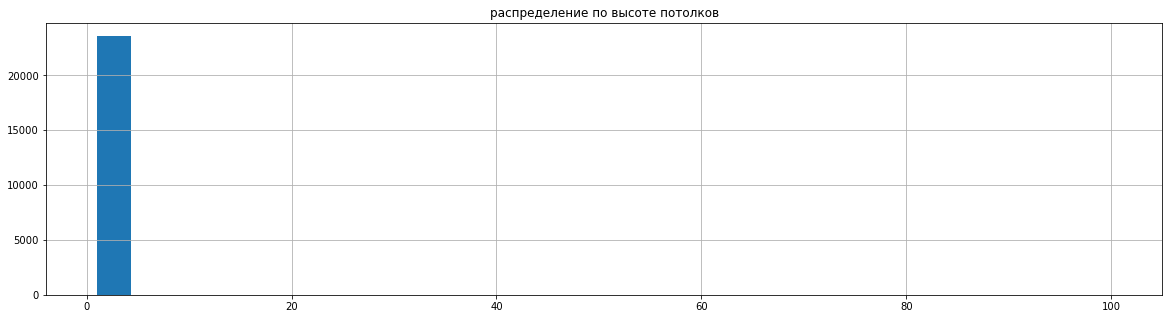

In [50]:
df['ceiling_height'].hist(bins=30, figsize=(20, 5))
plt.title('распределение по высоте потолков')
plt.show()

кажется, что все наблюдения сосредоточены в промежутке до 5 метров. приблизим этот участок

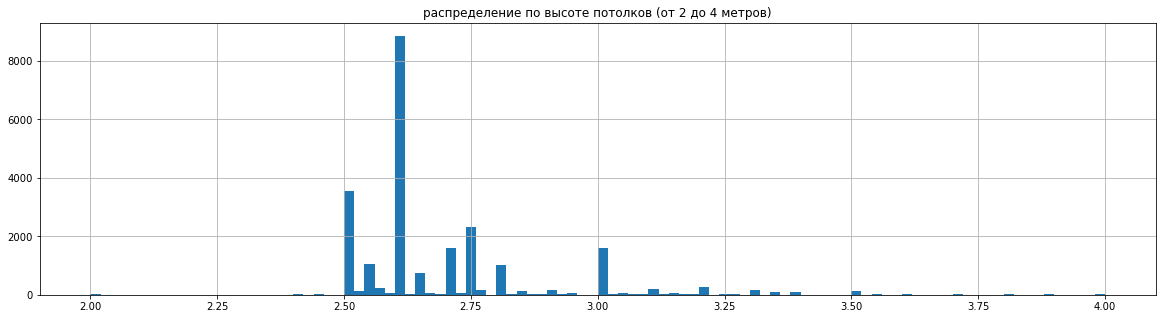

In [51]:
df['ceiling_height'].hist(bins=100, figsize=(20, 5), range = (2, 4))
plt.title('распределение по высоте потолков (от 2 до 4 метров)')
plt.show()

чаще всего высота потолка составляет от 2,5 до 3,5 метров. Пик приходится примерно на 2,6 метра

### *автоматизация построения гистограмм при помощи цикла `for`*

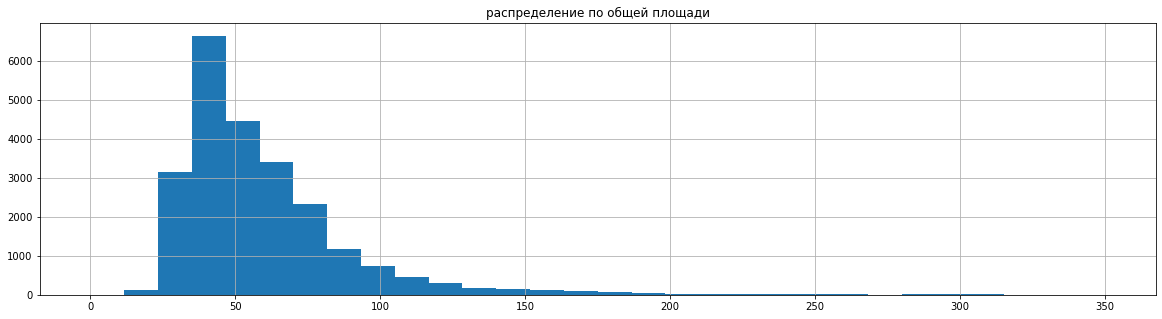

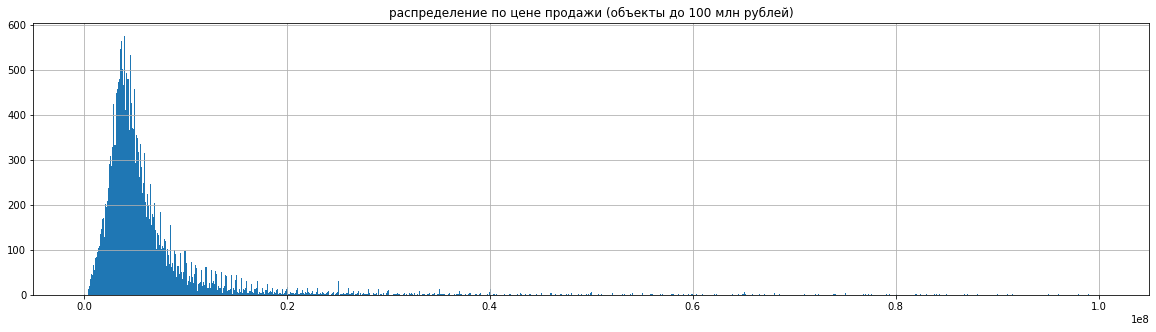

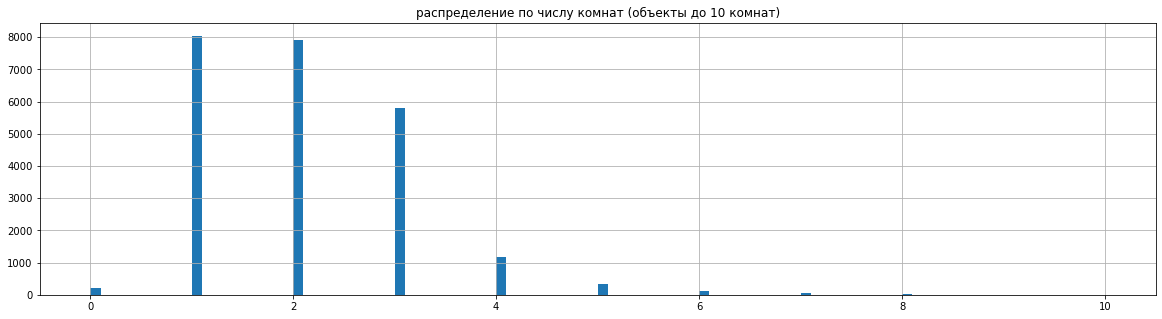

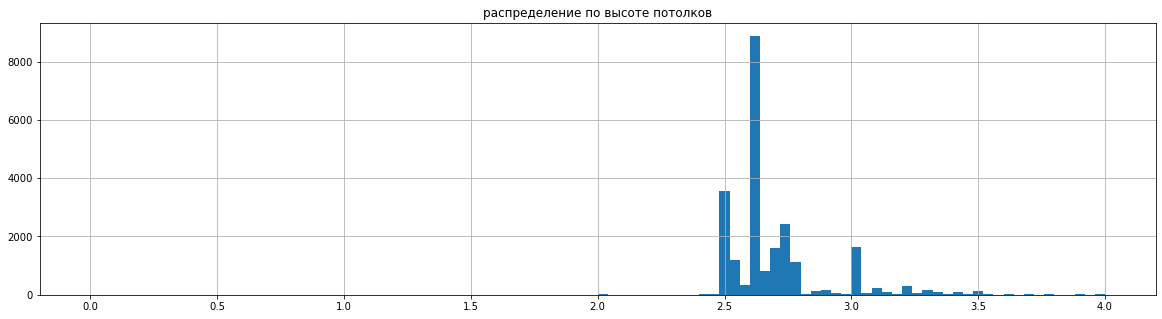

In [52]:
param_dict = {'total_area': {'bins': 30,  'title': 'распределение по общей площади', 'max_range': 350},
'last_price': {'bins': 1000,  'title': 'распределение по цене продажи (объекты до 100 млн рублей)', 'max_range': 100000000},
             'rooms': {'bins': 100,  'title': 'распределение по числу комнат (объекты до 10 комнат)', 'max_range': 10},
             'ceiling_height': {'bins': 100,  'title': 'распределение по высоте потолков', 'max_range': 4}}
for key, value in param_dict.items():
    df[key].hist(bins=value['bins'], figsize=(20, 5), range=(0, value['max_range']))
    plt.title(value['title'])
    plt.show()

<a id="step42"></a>
#### время продажи квартиры

In [53]:
df['days_exposition'].mean()

170.8707822410148

In [54]:
df['days_exposition'].median()

95.0

медиана почти в 2 раза меньше среднего. мы имеем дело с "эффектом билла гейтса": есть объекты, продажа которых занимает очень долгий срок. 


построим гистограмму

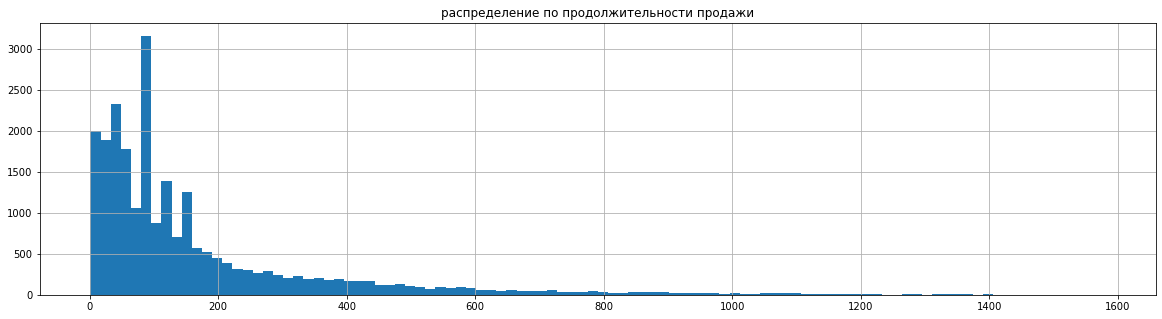

In [55]:
df['days_exposition'].hist(bins=100, figsize=(20, 5))
plt.title('распределение по продолжительности продажи')
plt.show()

большинство объектов не задерживается на рынке больше, чем на 200 дней. приблизим этот участок

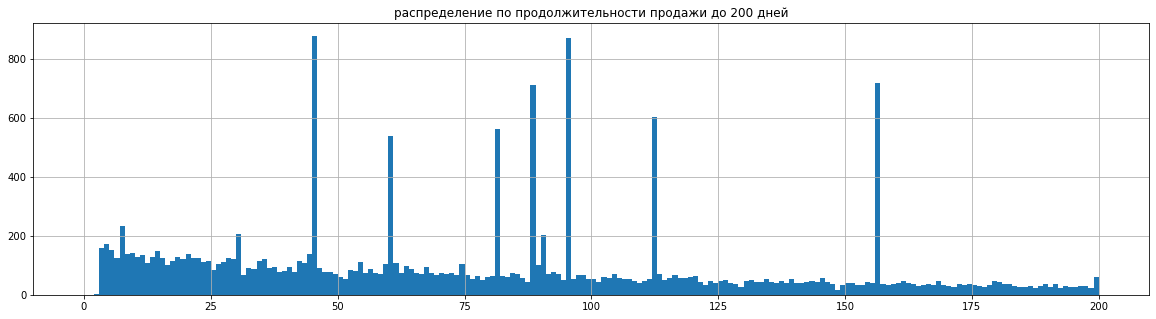

In [56]:
df['days_exposition'].hist(bins=200, figsize=(20, 5), range=(0, 200))
plt.title('распределение по продолжительности продажи до 200 дней')
plt.show()

Интересное распределение: четко видны пики. Первый из них приходится примерно на 45 дней. 


Теперь рассмотрим подробнее вторую часть гистограммы

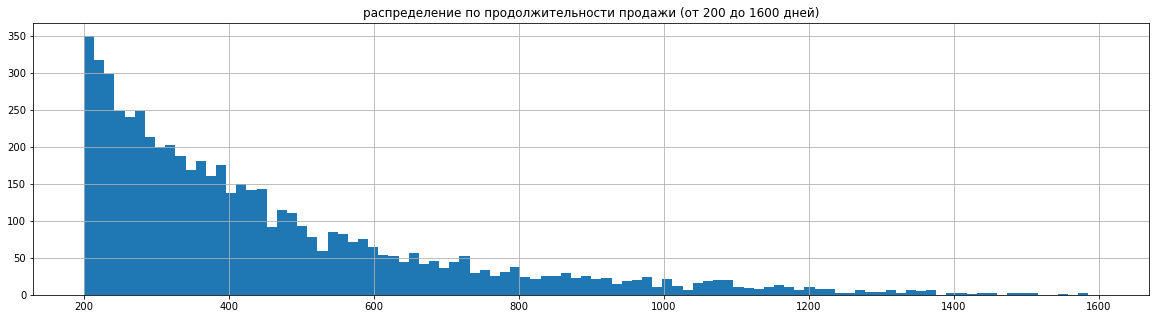

In [57]:
df['days_exposition'].hist(bins=100, figsize=(20, 5), range=(200, 1600))
plt.title('распределение по продолжительности продажи (от 200 до 1600 дней)')
plt.show()

Видно постепенное снижение без пиков. Примерно после до 800 дней снижение более медленное, чем в промежутке (200, 800). Будем предварительно считать долгими продажи, которые заняли более 2 лет, то есть 730 дней. 

<a id="step43"></a>
#### редкие и выбивающиеся значения

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23650.0,9.862326e+00,5.682278e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23650.0,6.541127e+06,1.089640e+07,12190.000000,3.400000e+06,4.650000e+06,6.799000e+06,7.630000e+08
total_area,23650.0,6.032907e+01,3.566181e+01,12.000000,4.000000e+01,5.200000e+01,6.970000e+01,9.000000e+02
rooms,23650.0,2.070106e+00,1.078620e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23650.0,2.724736e+00,9.920657e-01,1.000000,2.600000e+00,2.600000e+00,2.750000e+00,1.000000e+02
floors_total,23650.0,1.066985e+01,6.583725e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,23650.0,3.456631e+01,2.198895e+01,2.000000,1.860000e+01,3.000000e+01,4.230000e+01,4.097000e+02
floor,23650.0,5.893277e+00,4.883317e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,23650.0,1.046693e+01,5.686538e+00,1.300000,7.300000e+00,9.000000e+00,1.190000e+01,1.120000e+02
balcony,23650.0,5.917125e-01,9.596620e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


используем диаграмму размаха для определения выбросов

In [59]:
import matplotlib.pyplot as plt

*общая площадь*

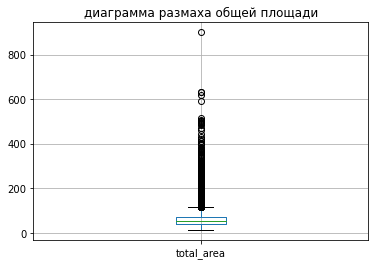

In [60]:
df.boxplot(column='total_area')
plt.title('диаграмма размаха общей площади')
plt.show()

основная часть объектов имеют площадь 40-70 кв.метров, медиана находится на уровне 50 кв.метров. Объекты площадью более 115 кв.метров и меньше 15 кв. метров можно отнести к выбивающимся на основе диаграммы разброса. Но величина 115 кв метров не кажется неправдоподобной, например, для загородного жилья. будем считать редкими объекты с площадью более 500 кв метров

*цена*

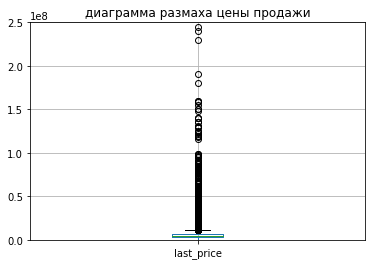

In [61]:
df.boxplot(column='last_price')
plt.ylim(0, 250000000)
plt.title('диаграмма размаха цены продажи')
plt.show()

диаграмма подтверждает выводы, сделанные на основе гистограммы: она определяет как редкие все объекты с ценой более 12 млн рублей. Большая же часть объектов имеет цену, не превышающую 7 млн рублей. Однако 12 млн не кажется неправдоподобной величиной, к тому же число объектов, цена которых превышает 12 млн, составляет почти 2000 или около 10% наблюдений. их не стоит относить к редким. будем считать редкими значения цены больше 100 млн 

*число комнат*

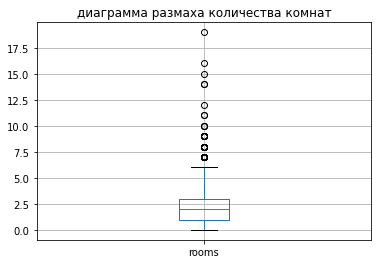

In [62]:
df.boxplot(column='rooms')
plt.title('диаграмма размаха количества комнат')
plt.show()

In [63]:
len(df.query('rooms > 6'))

90

из диаграммы можно заключить, что редкими значениями являются объекты, где более 6 комнат. напомним, что на основе гистограммы мы предположили, что объекты с 6 комнатами уже можно отнести к выбросам. число объектов, в которых количство комнат строго больше 6, невелико - 90 наблюдений или около 0,4% от общего числа наблюдений

*высота потолков*

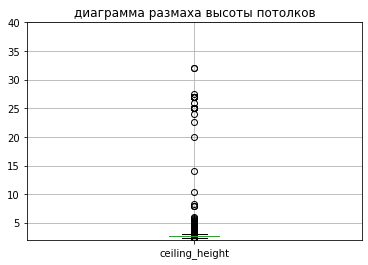

In [64]:
df.boxplot(column='ceiling_height')
plt.ylim(2, 40)
plt.title('диаграмма размаха высоты потолков')
plt.show()

интересно, что первый квартиль совпадает с медианным значением. разброс здесь небольшой и значения выше 3 метров уже можно считать редкими. но мы можем видеть достаточно большое количество наблюдений с высотой потолков 3-6 метров. эти значения выглядят правдоподобно, например для старого фонда в центре города. можно их сохранить. также, изменяя параметр ylim мы обнаружили скопление наблюдений в диапазоне 24-35 м. Можно предположить, что здесь ошибка в 10 раз и поробовать разделить для этих наблюдений высоту потолка на 10.

In [65]:
df.loc[(df['ceiling_height'] >= 24) & (df['ceiling_height'] <= 35), 'ceiling_height']= df['ceiling_height']  / 10

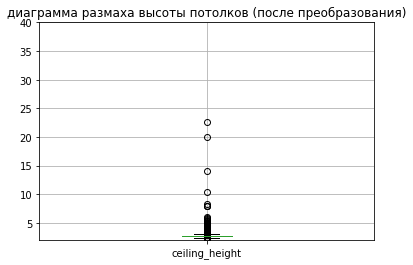

In [66]:
df.boxplot(column='ceiling_height')
plt.ylim(2, 40)
plt.title('диаграмма размаха высоты потолков (после преобразования)')
plt.show()

*время продажи квартиры*

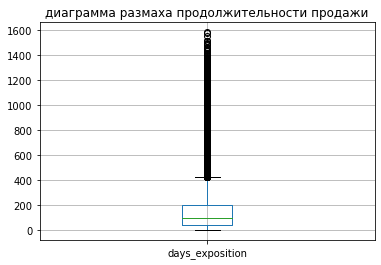

In [67]:
df.boxplot(column='days_exposition')
plt.title('диаграмма размаха продолжительности продажи')
plt.show()

мы верно определили, что основная масса объектов оказывается продана в течение 200 дней с момента размещения объявления. К нетипично длинным продажам на основе диаграммы можно отнести те, которые заняли более 440 дней. Это значительно меньше, чем мы предположили на основе гистограммы (730 дней). После 440 дней плотность распределения наблюдений высокая и она остается равномерной на всем протяжении. попробуем ничего не отбрасывать. Интересно также, что диаграмма размаха не показывает необычно быстрых продаж. 

уберем выбросы по данным условиям:
1. объекты площадью более 500 кв.метров и меньше 15 кв. метров 
2. объекты с ценой более 100 млн рублей
3. объекты, где более 6 комнат
4. объекты с высотой потолка ниже 2,4 и выше 6 метров 

In [68]:
df_normal = df.query('total_area > 15 and total_area <500')

In [69]:
len(df_normal)

23633

In [70]:
df_normal = df_normal.query('ceiling_height > 2.4 and ceiling_height <6')

In [71]:
len(df_normal)

23578

In [72]:
df_normal = df_normal.query('last_price < 100000000')

In [73]:
len(df_normal)

23548

In [74]:
df_normal = df_normal.query('rooms <= 6')

In [75]:
len(df_normal)

23468

<a id="step44"></a>
#### какие факторы больше всего влияют на стоимость квартиры?

*общая площадь*

<AxesSubplot:title={'center':'зависимость цены от общей площади'}, xlabel='total_area', ylabel='last_price'>

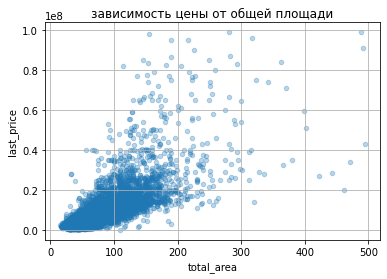

In [76]:
df_normal.plot(x='total_area', y='last_price', kind= 'scatter', alpha=0.3, grid=True, title='зависимость цены от общей площади')

In [77]:
df_normal['total_area'].corr(df_normal['last_price'])

0.7589992020620968

сильная положительная корреляция между площадью и ценой

*число комнат*

<AxesSubplot:title={'center':'зависимость цены от числа комнат'}, xlabel='rooms', ylabel='last_price'>

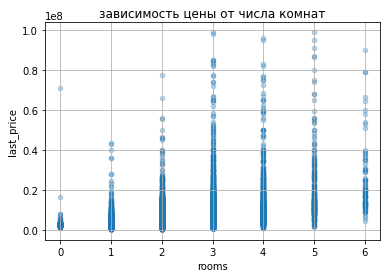

In [78]:
df_normal.plot(x='rooms', y='last_price', kind= 'scatter', alpha=0.3, grid=True, title='зависимость цены от числа комнат')

In [79]:
df_normal['rooms'].corr(df_normal['last_price'])

0.44411362657033365

положительная корреляция средней силы между ценой и количеством комнат

*удаленность от центра*

<AxesSubplot:title={'center':'зависимость цены от удаленности от центра'}, xlabel='cityCenters_nearest', ylabel='last_price'>

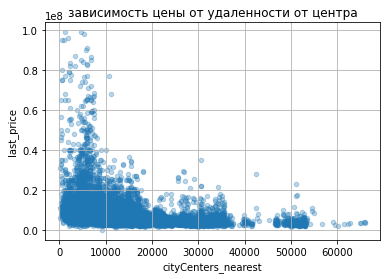

In [80]:
df_normal.plot(x='cityCenters_nearest', y='last_price', kind= 'scatter', alpha=0.3, grid=True, title='зависимость цены от удаленности от центра')

In [81]:
df_normal['cityCenters_nearest'].corr(df_normal['last_price'])

-0.2989986944560839

отрицательная корреляция между ценой и удаленностью от центра. коэффициент корреляции небольшой (-0,29), но диаграмма рассеяния показывает, что экстремально дорогие объекты находятся не дальше 10000м от центра

*тип этажа*

<AxesSubplot:title={'center':'зависимость цены от типа этажа'}, xlabel='floor_type'>

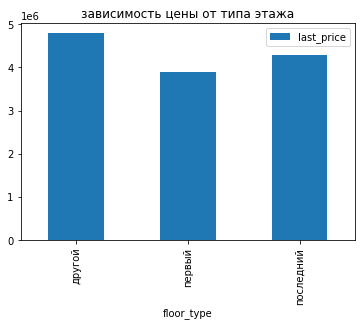

In [82]:
df_normal.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='зависимость цены от типа этажа')

медианная цена объектов на первом этаже ниже, чем на других этажах

*размещение_день недели*

<AxesSubplot:title={'center':'зависимость цены от дня размещения объявления'}, xlabel='exposition_weekday'>

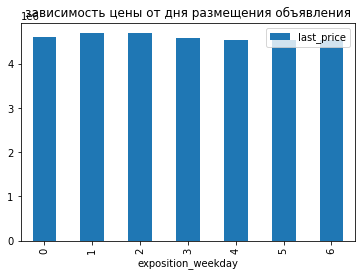

In [83]:
df_normal.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='зависимость цены от дня размещения объявления')

разница не очень велика, но все же медианная цена для объявлений, размещенных в середине недели или в выходные, выше

<AxesSubplot:title={'center':'зависимость цены от месяца размещения объявления'}, xlabel='exposition_month'>

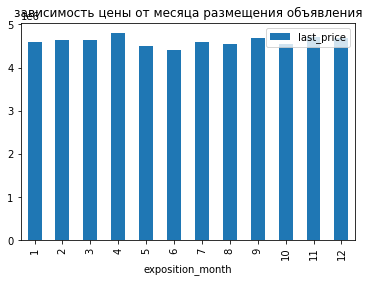

In [84]:
df_normal.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='зависимость цены от месяца размещения объявления')

хорошо заметно затишье на рынке в летний период (месяцы с 5(май) по 8(август))

<AxesSubplot:title={'center':'зависимость цены от года размещения объявления'}, xlabel='exposition_year'>

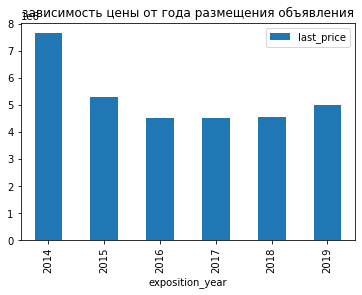

In [85]:
df_normal.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='зависимость цены от года размещения объявления')

очень интересный график получился. очень сильное снижение от 2014 к 2015 году. возможно, сказывается общее падение уровня жизни и соответсвующее снижение платежеспособного спроса в этот период. для объяснения также полезны были бы данные до 2014 года, чтобы понять природу цен 2014 года (тренд, всплеск и тд)

<a id="step45"></a>
#### 10 населённых пунктов с наибольшим числом объявлений

In [86]:
df_normal.groupby('locality_name')['price_per_sqm'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,15574,113545.995910
посёлок мурино,522,85752.189195
посёлок шушары,440,78677.364217
всеволожск,397,68719.320400
пушкин,365,103122.752511
колпино,336,75352.475583
посёлок парголово,326,90332.263023
гатчина,307,68746.146763
деревня кудрово,299,92473.547576


среди 10 населенных пунктов с самым большим числом объявлений наибольшая цена жилья в расчете на кв метр характерна для санкт-петербурга (113546 руб за кв м), а наименьшая - для выборга (58238 руб за кв м)

<a id="step46"></a>
#### какая область входит в центр

In [87]:
df_spb = df_normal.query('locality_name == "санкт-петербург"')

расстояние до центра для каждого объекта в санкт-петербурге

In [88]:
df_spb['to_center_km'] = (df_spb['cityCenters_nearest'] / 1000).round(0)

<ipython-input-88-3c7ec8f9388b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['to_center_km'] = (df_spb['cityCenters_nearest'] / 1000).round(0)


In [89]:
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,area_group,price_group,price_per_sqm,exposition_weekday,exposition_month,exposition_year,floor_type,area_liv_to_tot,area_kitch_to_tot,to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,"(100.0, 200.0]","(10000000.0, 763000000.0]",120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,"(52.0, 70.0]","(4650000.0, 6800000.0]",92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,72.2,9,False,...,"(100.0, 200.0]","(10000000.0, 763000000.0]",408176.100629,4,7,2015,другой,0.454088,0.100629,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,"(70.0, 100.0]","(6800000.0, 10000000.0]",100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.75,24.0,48.0,22,False,...,"(70.0, 100.0]","(6800000.0, 10000000.0]",110544.692737,3,4,2019,другой,0.670391,0.263966,12.0


цена в расчете на 1 км до центра

In [90]:
df_spb['price_per_km'] = df_spb['last_price'] / df_spb['to_center_km']

<ipython-input-90-140a058f8fdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['price_per_km'] = df_spb['last_price'] / df_spb['to_center_km']


In [91]:
df_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_group,price_per_sqm,exposition_weekday,exposition_month,exposition_year,floor_type,area_liv_to_tot,area_kitch_to_tot,to_center_km,price_per_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,"(10000000.0, 763000000.0]",120370.370370,3,3,2019,другой,0.472222,0.231481,16.0,8.125000e+05
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,"(4650000.0, 6800000.0]",92785.714286,3,8,2015,другой,0.612500,0.148214,14.0,3.711429e+05
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,72.2,9,False,...,"(10000000.0, 763000000.0]",408176.100629,4,7,2015,другой,0.454088,0.100629,7.0,9.271429e+06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,"(6800000.0, 10000000.0]",100000.000000,1,6,2018,другой,0.320000,0.410000,8.0,1.250000e+06
7,5,7915000.0,71.6,2019-04-18,2,2.75,24.0,48.0,22,False,...,"(6800000.0, 10000000.0]",110544.692737,3,4,2019,другой,0.670391,0.263966,12.0,6.595833e+05
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,"(4650000.0, 6800000.0]",88524.590164,6,2,2017,другой,0.714754,0.106557,15.0,3.600000e+05
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,"(4650000.0, 6800000.0]",127525.252525,3,11,2017,другой,0.512626,0.214646,14.0,3.607143e+05
15,16,4650000.0,39.0,2017-11-18,1,2.60,14.0,20.5,5,False,...,"(3400000.0, 4650000.0]",119230.769231,5,11,2017,другой,0.525641,0.194872,14.0,3.321429e+05
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,"(4650000.0, 6800000.0]",81707.317073,3,11,2017,первый,0.678049,0.109756,11.0,6.090909e+05
17,6,4180000.0,36.0,2016-09-09,1,2.60,17.0,16.5,7,False,...,"(3400000.0, 4650000.0]",116111.111111,4,9,2016,другой,0.458333,0.305556,15.0,2.786667e+05


(0.0, 10.0)

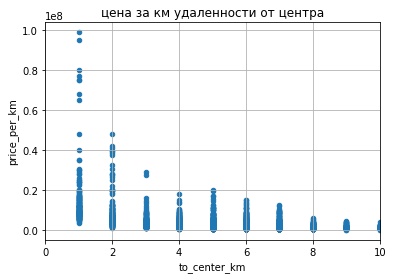

In [92]:
df_spb.plot(x='to_center_km', y='price_per_km', kind= 'scatter', grid=True, title='цена за км удаленности от центра').set_xlim(0,10)

будем считать центральной зоной зону с удаленностью от центра не более 4 км

<a id="step47"></a>
#### сегмент квартир в центре

In [93]:
df_spb_center = df_spb.query('to_center_km <= 4')

In [94]:
df_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,price_per_sqm,exposition_weekday,exposition_month,exposition_year,area_liv_to_tot,area_kitch_to_tot,to_center_km,price_per_km
count,1511.000000,1.511000e+03,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,...,1181.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.0
mean,10.256784,1.249699e+07,90.562118,2.906684,3.036095,5.763733,54.806724,3.487756,13.917975,0.182660,...,409.678239,235.573130,135680.430976,2.487756,6.422237,2017.168101,0.596598,0.167107,2.961615,inf
std,6.160888,1.119236e+07,43.465164,1.233055,0.368983,2.891716,30.037423,2.301673,8.015640,0.588851,...,272.832102,258.459839,72689.338012,1.702263,3.517093,1.132103,0.109440,0.081720,1.122843,NaN
min,0.000000,1.600000e+06,16.000000,0.000000,2.450000,2.000000,9.000000,1.000000,2.000000,0.000000,...,22.000000,3.000000,15861.571738,0.000000,1.000000,2014.000000,0.141304,0.045249,0.000000,400000.0
25%,6.000000,6.900000e+06,61.000000,2.000000,2.750000,4.000000,34.000000,2.000000,9.000000,0.000000,...,181.000000,75.000000,95861.872146,1.000000,3.000000,2017.000000,0.531458,0.115635,2.000000,2096125.0
50%,10.000000,9.300000e+06,81.400000,3.000000,3.000000,5.000000,48.000000,3.000000,11.900000,0.000000,...,364.000000,156.000000,117244.897959,3.000000,6.000000,2017.000000,0.610738,0.144695,3.000000,3247500.0
75%,15.000000,1.352249e+07,110.000000,4.000000,3.215000,6.000000,69.450000,4.000000,16.000000,0.000000,...,638.000000,298.000000,148819.444444,4.000000,10.000000,2018.000000,0.672441,0.193138,4.000000,5950000.0
max,50.000000,9.900000e+07,323.000000,6.000000,5.800000,25.000000,255.700000,25.000000,87.200000,5.000000,...,1293.000000,1572.000000,848484.848485,6.000000,12.000000,2019.000000,0.972222,0.560526,4.000000,inf


в центральную зону попали 1511 объектов

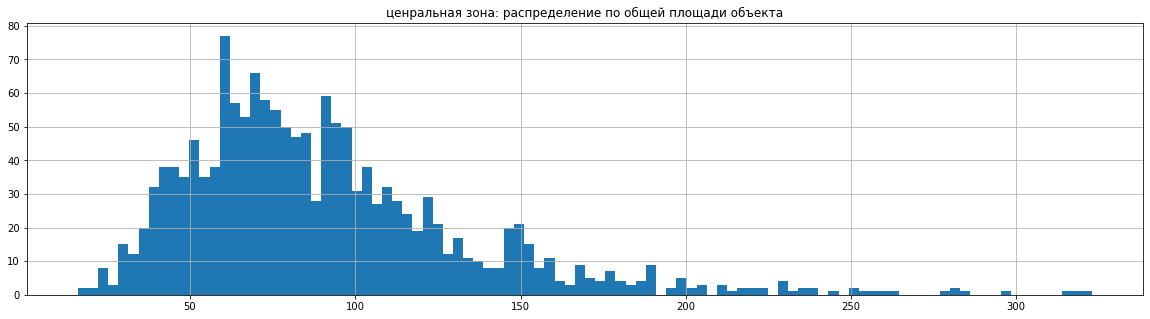

In [95]:
df_spb_center['total_area'].hist(bins=100, figsize=(20, 5))
plt.title('ценральная зона: распределение по общей площади объекта')
plt.show()

для центральной зоны наиболее характерная общая площадь составляет примерно 60 кв м (для всего датафрейма этот показатель составил 40-45 кв м) 

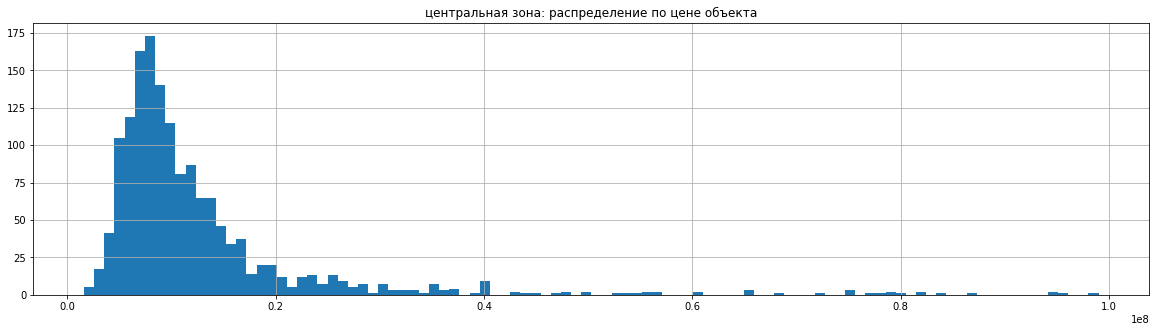

In [96]:
df_spb_center['last_price'].hist(bins=100, figsize=(20, 5))
plt.title('центральная зона: распределение по цене объекта')
plt.show()

пикового значения гистограмма цены для центральной зоны достигает на уровне около 10 млн руб. для всего датафрейма пиковое значение гистограммы находилось на уровне около 4 млн руб, то есть в 2,5 раза меньше

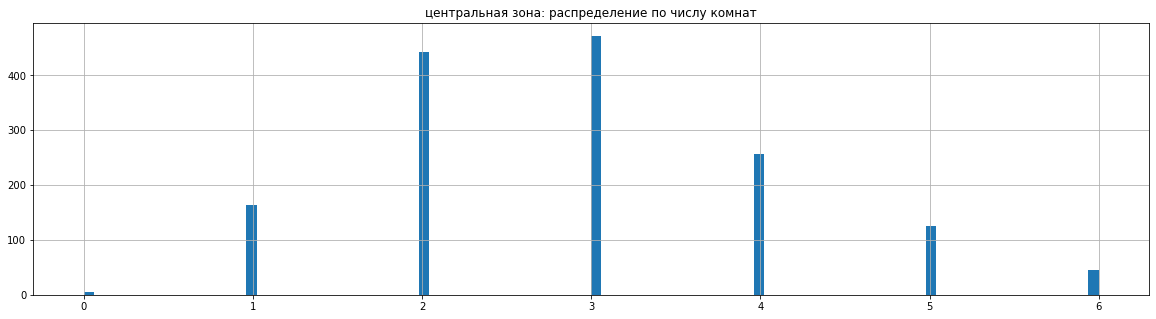

In [97]:
df_spb_center['rooms'].hist(bins=100, figsize=(20, 5))
plt.title('центральная зона: распределение по числу комнат')
plt.show()

самое часто встречающееся количество комнат в центральной зоне - 3. Почти так же часто встречаются двухкомнатные. Однокомнатные квартиры в центре встречаются более, чем в два раза реже двухкомнатных. Для всего датафрейма характерно примерно равное число одно- и двухкомнатных квартир

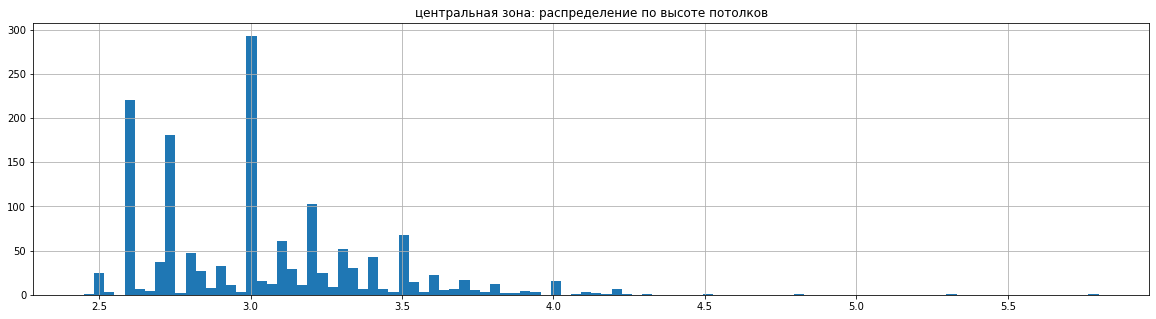

In [98]:
df_spb_center['ceiling_height'].hist(bins=100, figsize=(20, 5))
plt.title('центральная зона: распределение по высоте потолков')
plt.show()

самой часто встечающейся высотой потолков в центральной зоне является 3 метра. Это выше, чем для всего датафрейма (2,6 метра) 

*воздействие на цену основных факторов:*


*общая площадь*

In [99]:
df_spb_center['total_area'].corr(df_spb_center['last_price'])

0.6612808562485776

сильная положительная корреляция между общей площадью квартиры и ее ценой


*расстояние до центра*

In [100]:
df_spb_center['to_center_km'].corr(df_spb_center['last_price'])

-0.1907517312278301

слабая отрицательная корреляция. Предположительно это объясняется тем, что центральная зона небольшая по своему размеру и значит расположение объекта в любой ее части для покупателя равноценно. отличия в ценах формируются под влиянием других факторов 


*число комнат*

In [101]:
df_spb_center['rooms'].corr(df_spb_center['last_price'])

0.3366002238840413

слабая положительная корреляция между числом комнат и ценой. Видимо, само по себе количество комнат не определяет качество объекта


*тип этажа*

<AxesSubplot:title={'center':'центральная зона: зависимость цены от типа этажа'}, xlabel='floor_type'>

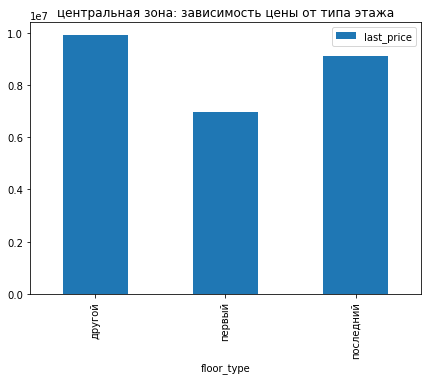

In [102]:
df_spb_center.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='центральная зона: зависимость цены от типа этажа', figsize=(7, 5))

первый этаж ценится ниже других. в этом центральная зона аналогична всему датафрейму

<AxesSubplot:title={'center':'центральная зона: зависимость цены от дня размещения объявления'}, xlabel='exposition_weekday'>

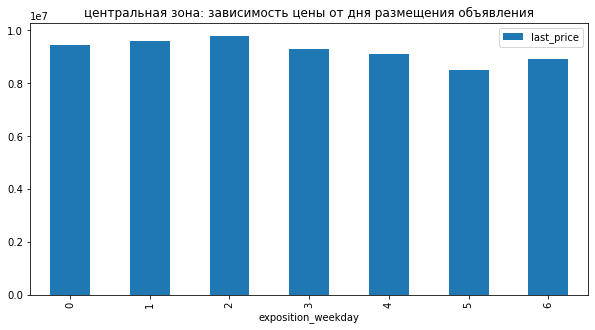

In [103]:
df_spb_center.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='центральная зона: зависимость цены от дня размещения объявления', figsize=(10, 5))

так же, как и для других объектов, наилучшим днем представляется вторник. Однако есть заметный спад в субботу. По всей видимости, состоятельные люди не утруждают себя делами в выходной

<AxesSubplot:title={'center':'центральная зона: зависимость цены от месяца размещения объявления'}, xlabel='exposition_month'>

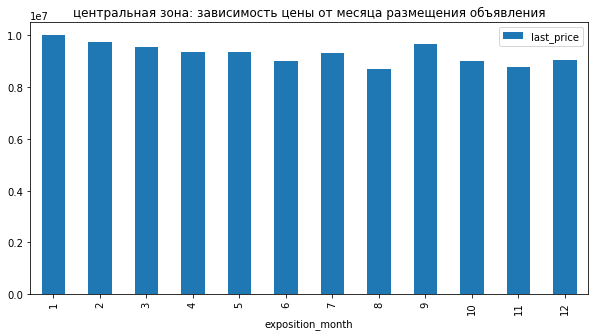

In [104]:
df_spb_center.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='центральная зона: зависимость цены от месяца размещения объявления', figsize=(10, 5))

для центральной зоны харатерно замедление активности в летний период. в этом она повторяет поведение всего датафрейма. Самая высокая медианная цена характерна для объектов, выставленных на продажу в январе и сентябре. Интересно, что май является активным месяцем, в отличие от данных по всему датафрейму. Видимо, майские праздники не вносят таких изменений в жизнь состоятельных людей, как всех других

<AxesSubplot:title={'center':'центральная зона: зависимость цены от года размещения объявления'}, xlabel='exposition_year'>

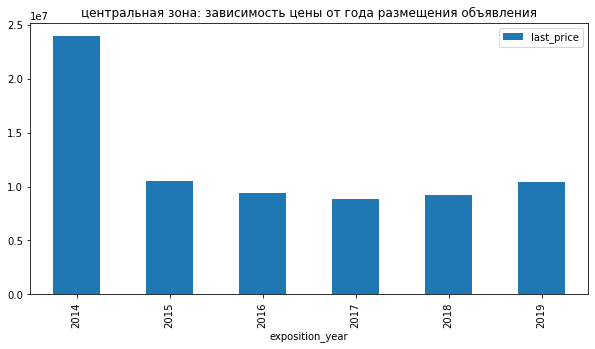

In [105]:
df_spb_center.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'median').plot(kind='bar', title='центральная зона: зависимость цены от года размещения объявления', figsize=(10, 5))

видим существенное снижение от 2014 до 2015 года. причины вероятнее всего аналогичны причинам снижения для всего датафрейма: неблагоприятная экономическая ситуация, снижение уровня жизни. 

### Шаг 4. Вывод

Мы исследовали основные параметры оьъектов недвижимости, представленных в датасете: площадь, цена, число комнат, высота потолков


Наибольшее число представленных объектов по общей площади находится в диапазоне 40-45 кв. метров, что примерно соответствует просторной однокомнатной или небольшой двухкомнатной квартире. Этот вывод подтверждается распределением объектов по числу комнат. Одно- и двухкомнатные квартиру в сумме составляют более 50% всех преставленных объектов (примерно 16 тыс наблюдений). Стандартная высота потолков варьируется от 2,5 до 3 метров. Чаще всего объекты недвижимости продаются по цене около 4 млн рублей. 


Сроки продажи квартиры имеют любопытное распределение с очень явными пиками в течение первых 6 месяцев размещения и последующим плавным снижением. Необычно долгими продажами могут быть названы те, что занимают более 2 лет (730 дней). Относительно необычно быстрых продаж выоды получились неоднозначными. Первый пик приходится примерно на срок 45 дней. Но некоторое стабильное количество квартир (примерно по 100 объектов) имеют меньшие сроки продажи. Поэтому однозначно выявить точку отсечения не удалось. Как выбивающиеся были исключены объекты со следующими характеристиками:

- объекты площадью более 500 кв.метров и меньше 15 кв. метров
- объекты с ценой более 100 млн рублей
- объекты, где более 6 комнат
- объекты с высотой потолка ниже 2,4 и выше 6 метров


Мы исследовали воздействие отдельных факторов на цену: общая площадь (сильная положительная корреляция 0,76), число комнат (положительная окрреляция средней силы), удаленность от ценра (отрицательная корреляция средней силы), этаж (первый этаж ценится меньше других). Исследование дат размещения объявления показывает, что на рынке произошел существенный спад цен от 2014 к 2015 году. Кроме того, на рынке видна сезонность (летнее снижение цен) и даже колебание активности в течение одной рабочей недели: объекты, выставленные на продажу в середине недели и в выходные дни немного превосходят по цене остальные.


Среди 10 населенных пунктов с самым большим числом объявлений наибольшая цена жилья в расчете на кв метр характерна для санкт-петербурга (113546 руб за кв м), а наименьшая - для выборга (58238 руб за кв м)


Мы выделили центральную зону города Санкт-Петербурга и пришли к выводу, что ее радиус составляет примерно 4 км. Для объектов в этой области характерна более высокая цена (10 млн руб или в 2,4 раза выше,чем для всего датасета), большая выоста потолка и большее число комнат. На цену объектов в центре так же сильно влияет их площадь (коэффициент корреляции 0,66).  Удаленность от центра слабо отрицательно влияет на цену (коэффициент корреляции -0,19) Предположительно это объясняется тем, что центральная зона небольшая по своему размеру и значит расположение объекта в любой ее части для покупателя равноценно. Объекты на первом этаже так же ценятся ниже, чем на других этажах


В сегменте недвижимости в центре также заметен спад цен от 2014 к 2015 году, сезонные колебания и колебания внутри недели присутсвуют, но отличаются от колебаний для всего датасета. Самая высокая медианная цена характерна для объектов, выставленных на продажу в январе и сентябре. Интересно, что май является активным месяцем, в отличие от данных по всему датафрейму. Видимо, майские праздники не вносят таких изменений в жизнь состоятельных людей, как всех других. Так же, как и для других объектов, наилучшим днем представляется вторник. Однако есть заметный спад в субботу. По всей видимости, состоятельные люди не утруждают себя делами в выходной

<a id="step5"></a>
### Шаг 5. Общий вывод

1. Для предварительной обработки данных использовались различные методы:


- замена на простую медиану (количество этажей)
- замену на медиану с гурппировкой по другим параметрам (пропуски в жилой площади, площади кухни и высоте потолков заполняли, опираясь на группировку по общей площади; пропуски в сроках размещения объявления заполнили, опираясь на цену)
- замену на фиксированное значение (предположили, что пропуск в параметре "балкон" означает, что его нет, а пропуск в графе "апартаменты" означает, что объект не является апартаментами)
- название населнного пункта невозможно восстановить из других данных, поэтому такие строки были исключены


2. мы рассчитали цену квадратного метра, соотношение жилой площади и площади кухни к общей площади, а также классифицировали объекты по типу этажа (первый, последний, другой) и разбили дату публикации объявления на день, месяц и год


3. мы изучили диаграммы размаха отдельных параметров объявлений и на их основании исключили аномальные объекты, в результате в датасете осталось 23468 из 23699 объектов 


4. мы исследовали основные параметры объектов недвижимости (площадь, цена, число комнат, высота потолков) сначала для всего датасета, затем отдельно для центральной зоны города Санкт-Петербурга. Для определения центральной зоны мы выделили объекты, находящиеся в Санкт-Петербурге и рассчитали для них цену 1 км удаленности от центра. Выяснилось, что такая цена резко снижается, если объект находится дальше 4 км от центра. Мы приянли это за радиус центральной зоны. 


В ходе исследования выяснилось, что центральная зона по всем указанным параметрам превосходит показатели всего датасета. 


5. мы исследовали корреляцию между ценой и отдельными параметрами объектов недвижимости (общая площадь, число комнат, удаленность от центра, этаж, дата размещения) сначала для всего датасета, затем отдельно для центральной зоны города Санкт-Петербурга. Наибольшее положительное воздействие на цену оказывает площадь объекта, как в целом по датасету, так и отдельно по центральной зоне. Первый этаж оценивается ниже, чем любой другой. Число комнат в обоих случаях положительно связано с ценой, однако всязь достаточно слабая. Удаленность от центра оказывает слабое отрицательное воздействие на цену, причем для всего датасета коэффициент корреляции выше, чем отдельно для центра (-0,3 против -0,19). 


Мы обнаружили спад цен на рынке недвижимости в 2014-2015 году, который повлиял как на рынок в целом, так и на рынок недвижимости в центре. Мы также выявили сезонные колебания и даже колебания внутри рабочей недели.